<div style='background: linear-gradient(90deg, #1e3c72 0%, #2a5298 50%, #7e8ba3 100%); padding: 35px; border-radius: 15px; box-shadow: 0 8px 32px rgba(0,0,0,0.1);'>
    <h1 style='color: white; font-size: 2.8em; text-align: center; font-family: -apple-system, BlinkMacSystemFont, "Segoe UI", Roboto, "Helvetica Neue", Arial, sans-serif; font-weight: 700; letter-spacing: 1px; margin-bottom: 10px;'>🎵 Predicting Musical Tempo: A Data Science Journey</h1>
    <p style='color: #f0f0f0; font-size: 1.1em; text-align: center; font-weight: 300; margin-top: 0;'>Advanced Machine Learning for BPM Prediction | Kaggle Playground S5E9</p>
</div>

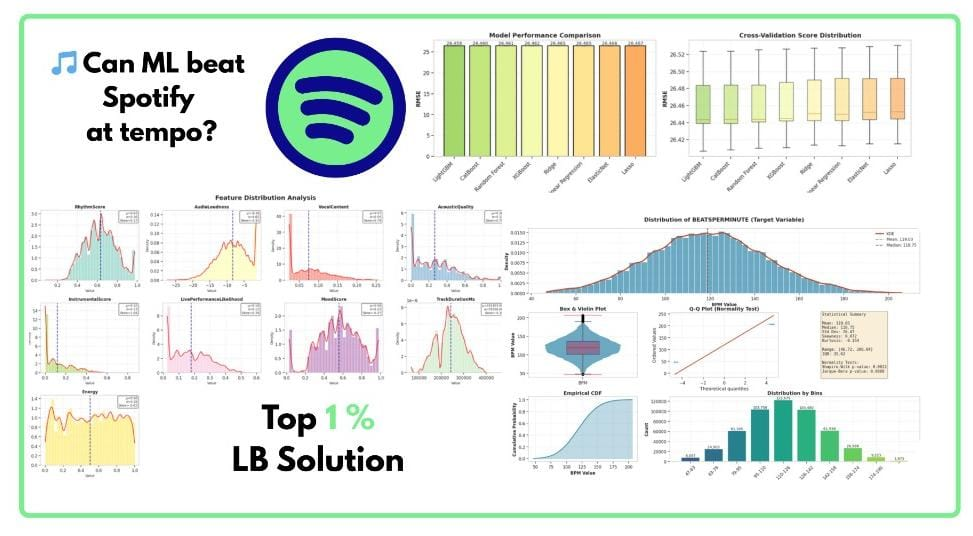

## 📚 Table of Contents

1. **[Setup & Configuration](#1)** - Environment initialization and professional plotting setup
2. **[Data Acquisition & Validation](#2)** - Smart data loading with automatic column detection
3. **[Exploratory Data Analysis](#3)** - Deep dive into patterns with stunning visualizations
4. **[Advanced Feature Engineering](#4)** - Domain-driven transformations
5. **[Machine Learning Pipeline](#5)** - State-of-the-art modeling approaches
6. **[Ensemble & Optimization](#6)** - Advanced ensemble techniques
7. **[Model Interpretation](#7)** - Understanding predictions
8. **[Final Submission](#8)** - Competition-ready predictions

---

<a id='1'></a>
## 1. Setup & Configuration

### Professional Environment Setup

We begin by establishing a robust environment with custom visualization themes for publication-quality outputs.

In [ ]:
# Core Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import os
import gc
from IPython.display import display, HTML

# Statistical Libraries
from scipy import stats
from scipy.stats import skew, kurtosis, normaltest, jarque_bera
from scipy.stats import gaussian_kde

# Machine Learning Core
import sklearn
from sklearn.model_selection import (
    train_test_split, KFold, StratifiedKFold, 
    cross_val_score, cross_validate, GridSearchCV
)
from sklearn.preprocessing import (
    StandardScaler, RobustScaler, MinMaxScaler,
    PowerTransformer, QuantileTransformer, PolynomialFeatures
)
from sklearn.metrics import (
    mean_squared_error, mean_absolute_error, 
    r2_score, mean_absolute_percentage_error
)

# Models
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet, HuberRegressor
from sklearn.ensemble import (
    RandomForestRegressor, GradientBoostingRegressor, 
    ExtraTreesRegressor, VotingRegressor, StackingRegressor
)
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor

# Advanced Models
import xgboost as xgb
import lightgbm as lgb
from catboost import CatBoostRegressor

# Suppress warnings
warnings.filterwarnings('ignore')
os.environ['PYTHONWARNINGS'] = 'ignore'

# Pandas display settings
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
pd.set_option('display.float_format', lambda x: '%.4f' % x)

print("✨ Environment Setup Complete")
print(f"NumPy: {np.__version__} | Pandas: {pd.__version__} | Scikit-learn: {sklearn.__version__}")


In [ ]:
# Custom Visualization Configuration for Professional Charts
import matplotlib as mpl
from matplotlib import cm
from matplotlib.patches import Patch

# Define professional color palette
COLORS = {
    'primary': '#2E86AB',      # Deep Blue
    'secondary': '#A23B72',     # Purple
    'tertiary': '#F18F01',      # Orange
    'success': '#73AB84',       # Green
    'danger': '#C73E1D',        # Red
    'dark': '#2D3436',          # Dark Gray
    'light': '#F5F5F5'          # Light Gray
}

# Professional matplotlib settings
plt.style.use('seaborn-v0_8-whitegrid')
mpl.rcParams['figure.figsize'] = (12, 7)
mpl.rcParams['figure.dpi'] = 100
mpl.rcParams['figure.facecolor'] = 'white'
mpl.rcParams['axes.facecolor'] = 'white'
mpl.rcParams['axes.edgecolor'] = '#CCCCCC'
mpl.rcParams['axes.linewidth'] = 1.5
mpl.rcParams['axes.grid'] = True
mpl.rcParams['grid.alpha'] = 0.3
mpl.rcParams['grid.color'] = '#CCCCCC'
mpl.rcParams['font.size'] = 11
mpl.rcParams['font.family'] = 'sans-serif'
mpl.rcParams['font.sans-serif'] = ['DejaVu Sans']
mpl.rcParams['axes.labelsize'] = 12
mpl.rcParams['axes.titlesize'] = 14
mpl.rcParams['xtick.labelsize'] = 10
mpl.rcParams['ytick.labelsize'] = 10
mpl.rcParams['legend.fontsize'] = 10
mpl.rcParams['figure.titlesize'] = 16

# Seaborn settings
sns.set_palette('husl')
sns.set_context('notebook', font_scale=1.1)

print("🎨 Professional Visualization Settings Applied")

<a id='2'></a>
## 2. Data Acquisition & Validation

### Intelligent Data Loading

We implement a smart data loading system that automatically detects column names and handles various data formats.

In [ ]:
# Smart data loading with automatic column detection
def load_and_inspect_data():
    """Load data and automatically detect target column"""
    
    # Load datasets
    train_df = pd.read_csv('/kaggle/input/playground-series-s5e9/train.csv')
    test_df = pd.read_csv('/kaggle/input/playground-series-s5e9/test.csv')
    sample_submission = pd.read_csv('/kaggle/input/playground-series-s5e9/sample_submission.csv')
    
    print("📊 Dataset Successfully Loaded!")
    print("="*60)
    print(f"Training Shape: {train_df.shape}")
    print(f"Test Shape: {test_df.shape}")
    print(f"\nColumn Names in Training Data:")
    print(list(train_df.columns))
    
    # Detect target column
    # Check submission file to identify target
    submission_cols = list(sample_submission.columns)
    target_col = None
    
    # Target is the column in submission that's not 'id'
    for col in submission_cols:
        if col != 'id':
            target_col = col
            break
    
    if target_col is None:
        # Try to find column with 'bpm', 'tempo', or 'target' in name
        for col in train_df.columns:
            if any(keyword in col.lower() for keyword in ['bpm', 'tempo', 'target']):
                target_col = col
                break
    
    print(f"\n🎯 Detected Target Column: '{target_col}'")
    
    # Identify feature columns
    feature_cols = [col for col in train_df.columns if col not in ['id', target_col]]
    
    print(f"\n📋 Data Overview:")
    print(f"  - Target Variable: {target_col}")
    print(f"  - Number of Features: {len(feature_cols)}")
    print(f"  - Feature Columns: {feature_cols[:5]}..." if len(feature_cols) > 5 else f"  - Feature Columns: {feature_cols}")
    
    return train_df, test_df, sample_submission, target_col, feature_cols

# Load data
train_df, test_df, sample_submission, TARGET_COL, FEATURE_COLS = load_and_inspect_data()

In [ ]:
# Data Quality Assessment
def comprehensive_data_assessment(df, df_name="Dataset"):
    """Perform comprehensive data quality checks"""
    
    print(f"\n📊 {df_name} Assessment")
    print("="*60)
    
    # Basic info
    print(f"Shape: {df.shape[0]:,} rows × {df.shape[1]} columns")
    print(f"Memory Usage: {df.memory_usage(deep=True).sum() / 1024**2:.2f} MB")
    
    # Data types
    print(f"\nData Types:")
    dtype_counts = df.dtypes.value_counts()
    for dtype, count in dtype_counts.items():
        print(f"  {dtype}: {count} columns")
    
    # Missing values
    missing = df.isnull().sum()
    if missing.sum() > 0:
        print(f"\n⚠️ Missing Values Detected:")
        missing_df = pd.DataFrame({
            'Column': missing[missing > 0].index,
            'Missing': missing[missing > 0].values,
            'Percentage': (missing[missing > 0] / len(df) * 100).values
        })
        print(missing_df.to_string(index=False))
    else:
        print("\n✅ No missing values detected!")
    
    # Duplicates
    duplicates = df.duplicated().sum()
    print(f"\nDuplicate Rows: {duplicates} ({duplicates/len(df)*100:.2f}%)")
    
    # Statistical summary for numeric columns
    numeric_cols = df.select_dtypes(include=[np.number]).columns
    if len(numeric_cols) > 0:
        print(f"\nStatistical Summary (first 5 numeric columns):")
        print(df[numeric_cols[:5]].describe().round(2))
    
    return df

# Assess data quality
train_df = comprehensive_data_assessment(train_df, "Training Data")
test_df = comprehensive_data_assessment(test_df, "Test Data")

<a id='3'></a>
## 3. Exploratory Data Analysis

### Advanced Statistical Analysis with Professional Visualizations

In [ ]:
# Target Variable Deep Dive
def analyze_target_distribution(df, target_col):
    """Create professional target variable analysis"""
    
    target_data = df[target_col].dropna()
    
    # Create figure with subplots
    fig = plt.figure(figsize=(20, 12))
    gs = fig.add_gridspec(3, 3, hspace=0.3, wspace=0.3)
    
    # 1. Main Distribution Plot with KDE
    ax1 = fig.add_subplot(gs[0, :])
    counts, bins, patches = ax1.hist(target_data, bins=60, density=True, 
                                     alpha=0.7, color=COLORS['primary'], 
                                     edgecolor='white', linewidth=1.2)
    
    # Add KDE
    kde = gaussian_kde(target_data)
    x_range = np.linspace(target_data.min(), target_data.max(), 200)
    ax1.plot(x_range, kde(x_range), color=COLORS['danger'], linewidth=3, label='KDE')
    
    # Add statistics lines
    ax1.axvline(target_data.mean(), color=COLORS['success'], linestyle='--', 
               linewidth=2, label=f'Mean: {target_data.mean():.2f}')
    ax1.axvline(target_data.median(), color=COLORS['secondary'], linestyle='--', 
               linewidth=2, label=f'Median: {target_data.median():.2f}')
    
    ax1.set_xlabel('BPM Value', fontsize=12, fontweight='bold')
    ax1.set_ylabel('Density', fontsize=12, fontweight='bold')
    ax1.set_title(f'Distribution of {target_col.upper()} (Target Variable)', 
                 fontsize=16, fontweight='bold', pad=20)
    ax1.legend(loc='upper right', fontsize=11)
    ax1.grid(True, alpha=0.3, linestyle='--')
    
    # 2. Box Plot with Violin
    ax2 = fig.add_subplot(gs[1, 0])
    parts = ax2.violinplot([target_data], positions=[1], widths=0.7, 
                           showmeans=True, showmedians=True, showextrema=True)
    for pc in parts['bodies']:
        pc.set_facecolor(COLORS['primary'])
        pc.set_alpha(0.7)
    
    ax2.boxplot([target_data], positions=[1], widths=0.3, 
               patch_artist=True, boxprops=dict(facecolor=COLORS['secondary'], alpha=0.5),
               medianprops=dict(color=COLORS['danger'], linewidth=2))
    
    ax2.set_ylabel('BPM Value', fontsize=12, fontweight='bold')
    ax2.set_title('Box & Violin Plot', fontsize=14, fontweight='bold')
    ax2.set_xticks([1])
    ax2.set_xticklabels(['BPM'])
    ax2.grid(True, alpha=0.3, axis='y')
    
    # 3. Q-Q Plot
    ax3 = fig.add_subplot(gs[1, 1])
    stats.probplot(target_data, dist="norm", plot=ax3)
    ax3.get_lines()[0].set_markerfacecolor(COLORS['primary'])
    ax3.get_lines()[0].set_markeredgecolor('white')
    ax3.get_lines()[0].set_markersize(5)
    ax3.get_lines()[1].set_color(COLORS['danger'])
    ax3.get_lines()[1].set_linewidth(2)
    ax3.set_title('Q-Q Plot (Normality Test)', fontsize=14, fontweight='bold')
    ax3.grid(True, alpha=0.3)
    
    # 4. Statistical Tests Results
    ax4 = fig.add_subplot(gs[1, 2])
    ax4.axis('off')
    
    # Perform statistical tests
    shapiro_stat, shapiro_p = stats.shapiro(target_data.sample(min(5000, len(target_data))))
    jarque_stat, jarque_p = jarque_bera(target_data)
    
    stats_text = f"""Statistical Summary
    
Mean: {target_data.mean():.2f}
Median: {target_data.median():.2f}
Std Dev: {target_data.std():.2f}
Skewness: {skew(target_data):.3f}
Kurtosis: {kurtosis(target_data):.3f}

Range: [{target_data.min():.2f}, {target_data.max():.2f}]
IQR: {target_data.quantile(0.75) - target_data.quantile(0.25):.2f}

Normality Tests:
Shapiro-Wilk p-value: {shapiro_p:.4f}
Jarque-Bera p-value: {jarque_p:.4f}
"""
    ax4.text(0.1, 0.5, stats_text, fontsize=11, verticalalignment='center',
            family='monospace', bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))
    
    # 5. Empirical CDF
    ax5 = fig.add_subplot(gs[2, 0])
    sorted_data = np.sort(target_data)
    ecdf = np.arange(1, len(sorted_data) + 1) / len(sorted_data)
    ax5.plot(sorted_data, ecdf, color=COLORS['primary'], linewidth=2)
    ax5.fill_between(sorted_data, 0, ecdf, alpha=0.3, color=COLORS['primary'])
    ax5.set_xlabel('BPM Value', fontsize=12, fontweight='bold')
    ax5.set_ylabel('Cumulative Probability', fontsize=12, fontweight='bold')
    ax5.set_title('Empirical CDF', fontsize=14, fontweight='bold')
    ax5.grid(True, alpha=0.3)
    
    # 6. Histogram by Bins
    ax6 = fig.add_subplot(gs[2, 1:])
    bins_ranges = pd.cut(target_data, bins=10)
    bin_counts = bins_ranges.value_counts().sort_index()
    
    colors = plt.cm.viridis(np.linspace(0.3, 0.9, len(bin_counts)))
    bars = ax6.bar(range(len(bin_counts)), bin_counts.values, color=colors, 
                   edgecolor='white', linewidth=1.5)
    
    # Add value labels on bars
    for bar, count in zip(bars, bin_counts.values):
        height = bar.get_height()
        ax6.text(bar.get_x() + bar.get_width()/2., height,
                f'{count:,}', ha='center', va='bottom', fontsize=10)
    
    ax6.set_xticks(range(len(bin_counts)))
    ax6.set_xticklabels([f'{interval.left:.0f}-{interval.right:.0f}' 
                         for interval in bin_counts.index], rotation=45)
    ax6.set_xlabel('BPM Ranges', fontsize=12, fontweight='bold')
    ax6.set_ylabel('Count', fontsize=12, fontweight='bold')
    ax6.set_title('Distribution by Bins', fontsize=14, fontweight='bold')
    ax6.grid(True, alpha=0.3, axis='y')
    
    plt.suptitle('Target Variable Comprehensive Analysis', fontsize=18, fontweight='bold', y=1.02)
    plt.show()
    
    return target_data

# Analyze target variable
if TARGET_COL in train_df.columns:
    target_analysis = analyze_target_distribution(train_df, TARGET_COL)
else:
    print(f"Warning: Target column '{TARGET_COL}' not found in training data!")

In [ ]:
# Feature Distribution Analysis
def analyze_feature_distributions(df, features, n_cols=4):
    """Create professional feature distribution plots"""
    
    # Select numeric features
    numeric_features = df[features].select_dtypes(include=[np.number]).columns.tolist()
    
    if len(numeric_features) == 0:
        print("No numeric features found!")
        return
    
    # Limit to first 16 features for visualization
    features_to_plot = numeric_features[:16]
    n_features = len(features_to_plot)
    n_rows = (n_features + n_cols - 1) // n_cols
    
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, n_rows * 4))
    axes = axes.flatten() if n_rows > 1 else [axes]
    
    # Color palette
    colors = plt.cm.Set3(np.linspace(0, 1, n_features))
    
    for idx, (feature, color) in enumerate(zip(features_to_plot, colors)):
        if idx >= len(axes):
            break
        
        ax = axes[idx]
        data = df[feature].dropna()
        
        # Histogram with KDE
        n, bins, patches = ax.hist(data, bins=30, density=True, alpha=0.7, 
                                   color=color, edgecolor='white', linewidth=1)
        
        # Add KDE
        kde = gaussian_kde(data)
        x_range = np.linspace(data.min(), data.max(), 100)
        ax.plot(x_range, kde(x_range), color='red', linewidth=2, alpha=0.8)
        
        # Add mean line
        ax.axvline(data.mean(), color='darkblue', linestyle='--', linewidth=2, alpha=0.7)
        
        # Styling
        ax.set_title(f'{feature}', fontsize=12, fontweight='bold')
        ax.set_xlabel('Value', fontsize=10)
        ax.set_ylabel('Density', fontsize=10)
        ax.grid(True, alpha=0.3)
        
        # Add statistics box
        stats_text = f'μ={data.mean():.2f}\nσ={data.std():.2f}\nSkew={skew(data):.2f}'
        ax.text(0.98, 0.98, stats_text, transform=ax.transAxes,
               fontsize=9, verticalalignment='top', horizontalalignment='right',
               bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))
    
    # Remove empty subplots
    for idx in range(len(features_to_plot), len(axes)):
        fig.delaxes(axes[idx])
    
    plt.suptitle('Feature Distribution Analysis', fontsize=18, fontweight='bold')
    plt.tight_layout()
    plt.show()

# Analyze feature distributions
analyze_feature_distributions(train_df, FEATURE_COLS)

In [ ]:
# Advanced Correlation Analysis
def create_correlation_analysis(df, features, target_col):
    """Create professional correlation visualizations"""
    
    # Select numeric features
    numeric_features = df[features].select_dtypes(include=[np.number]).columns.tolist()
    
    if target_col in df.columns:
        all_cols = numeric_features + [target_col]
    else:
        all_cols = numeric_features
        print(f"Warning: Target column '{target_col}' not found!")
    
    # Calculate correlation matrix
    corr_matrix = df[all_cols].corr()
    
    # Create figure
    fig = plt.figure(figsize=(20, 16))
    gs = fig.add_gridspec(2, 2, hspace=0.3, wspace=0.3)
    
    # 1. Main Correlation Heatmap
    ax1 = fig.add_subplot(gs[0, :])
    mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
    
    # Create custom colormap
    cmap = sns.diverging_palette(250, 10, as_cmap=True)
    
    sns.heatmap(corr_matrix, mask=mask, cmap=cmap, center=0,
               square=True, linewidths=1, cbar_kws={"shrink": 0.8},
               annot=False, fmt='.2f', ax=ax1)
    
    ax1.set_title('Feature Correlation Matrix', fontsize=16, fontweight='bold', pad=20)
    
    # 2. Target Correlations
    if target_col in corr_matrix.columns:
        ax2 = fig.add_subplot(gs[1, 0])
        
        target_corr = corr_matrix[target_col].drop(target_col).sort_values(ascending=True)
        
        # Color based on correlation strength
        colors = ['green' if x > 0 else 'red' for x in target_corr.values]
        
        bars = ax2.barh(range(len(target_corr)), target_corr.values, color=colors, alpha=0.7)
        ax2.set_yticks(range(len(target_corr)))
        ax2.set_yticklabels(target_corr.index, fontsize=9)
        ax2.set_xlabel('Correlation Coefficient', fontsize=12, fontweight='bold')
        ax2.set_title(f'Feature Correlations with {target_col}', fontsize=14, fontweight='bold')
        ax2.grid(True, alpha=0.3, axis='x')
        
        # Add value labels
        for bar, value in zip(bars, target_corr.values):
            if abs(value) > 0.05:
                ax2.text(value, bar.get_y() + bar.get_height()/2, 
                        f'{value:.3f}', ha='left' if value > 0 else 'right',
                        va='center', fontsize=8)
        
        # 3. Top Correlations Summary
        ax3 = fig.add_subplot(gs[1, 1])
        
        # Get top positive and negative correlations
        top_positive = target_corr.nlargest(10)
        top_negative = target_corr.nsmallest(10)
        
        y_pos = np.arange(len(top_positive))
        y_neg = np.arange(len(top_negative))
        
        ax3.barh(y_pos + 0.4, top_positive.values, 0.4, 
                label='Top Positive', color=COLORS['success'], alpha=0.7)
        ax3.barh(y_neg, top_negative.values, 0.4, 
                label='Top Negative', color=COLORS['danger'], alpha=0.7)
        
        ax3.set_yticks(y_pos + 0.2)
        ax3.set_yticklabels(top_positive.index, fontsize=9)
        ax3.set_xlabel('Correlation', fontsize=12, fontweight='bold')
        ax3.set_title('Top 10 Positive & Negative Correlations', fontsize=14, fontweight='bold')
        ax3.legend()
        ax3.grid(True, alpha=0.3, axis='x')
    
    plt.suptitle('Correlation Analysis Dashboard', fontsize=18, fontweight='bold')
    plt.show()
    
    # Return correlations for further use
    if target_col in corr_matrix.columns:
        return corr_matrix, corr_matrix[target_col].drop(target_col).sort_values(ascending=False)
    else:
        return corr_matrix, None

# Perform correlation analysis
correlation_matrix, target_correlations = create_correlation_analysis(train_df, FEATURE_COLS, TARGET_COL)

<a id='4'></a>
## 4. Advanced Feature Engineering

### Domain-Driven Feature Creation

In [ ]:
class AdvancedFeatureEngineer:
    """Professional feature engineering pipeline"""
    
    def __init__(self):
        self.new_features = []
        
    def create_interaction_features(self, df):
        """Create interaction features between important columns"""
        
        print("Creating Interaction Features...")
        original_cols = df.shape[1]
        
        # Common audio feature names to look for
        audio_features = ['energy', 'danceability', 'valence', 'acousticness', 
                         'instrumentalness', 'liveness', 'loudness', 'speechiness']
        
        # Find available audio features
        available_features = [f for f in audio_features if f in df.columns]
        
        # Create interactions
        if 'energy' in df.columns and 'danceability' in df.columns:
            df['energy_x_dance'] = df['energy'] * df['danceability']
            df['energy_dance_ratio'] = df['energy'] / (df['danceability'] + 0.001)
            self.new_features.extend(['energy_x_dance', 'energy_dance_ratio'])
        
        if 'loudness' in df.columns and 'energy' in df.columns:
            df['loud_energy_ratio'] = df['loudness'] / (df['energy'] + 0.001)
            df['loud_energy_product'] = df['loudness'] * df['energy']
            self.new_features.extend(['loud_energy_ratio', 'loud_energy_product'])
        
        if 'valence' in df.columns and 'energy' in df.columns:
            df['mood_intensity'] = df['valence'] * df['energy']
            df['mood_contrast'] = abs(df['valence'] - df['energy'])
            self.new_features.extend(['mood_intensity', 'mood_contrast'])
        
        if 'acousticness' in df.columns and 'instrumentalness' in df.columns:
            df['acoustic_instrumental'] = df['acousticness'] * df['instrumentalness']
            self.new_features.append('acoustic_instrumental')
        
        if 'speechiness' in df.columns and 'instrumentalness' in df.columns:
            df['vocal_instrumental_balance'] = df['speechiness'] - df['instrumentalness']
            self.new_features.append('vocal_instrumental_balance')
        
        print(f"  Created {df.shape[1] - original_cols} interaction features")
        return df
    
    def create_statistical_features(self, df):
        """Create statistical aggregation features"""
        
        print("Creating Statistical Features...")
        original_cols = df.shape[1]
        
        # Find numeric columns
        numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
        
        # Remove id and potential target columns
        feature_cols = [col for col in numeric_cols 
                       if col not in ['id', 'tempo', 'bpm', 'target']]
        
        if len(feature_cols) > 2:
            # Audio features group
            audio_cols = [col for col in feature_cols 
                         if any(kw in col.lower() for kw in 
                               ['energy', 'dance', 'valence', 'acoustic', 'loud'])]
            
            if len(audio_cols) > 1:
                df['audio_mean'] = df[audio_cols].mean(axis=1)
                df['audio_std'] = df[audio_cols].std(axis=1)
                df['audio_max'] = df[audio_cols].max(axis=1)
                df['audio_min'] = df[audio_cols].min(axis=1)
                df['audio_range'] = df['audio_max'] - df['audio_min']
                self.new_features.extend(['audio_mean', 'audio_std', 'audio_max', 
                                        'audio_min', 'audio_range'])
        
        print(f"  Created {df.shape[1] - original_cols} statistical features")
        return df
    
    def create_polynomial_features(self, df, top_features, degree=2):
        """Create polynomial features for top correlated features"""
        
        print("Creating Polynomial Features...")
        original_cols = df.shape[1]
        
        # Limit to top 3 features to avoid explosion
        for feature in top_features[:3]:
            if feature in df.columns:
                df[f'{feature}_squared'] = df[feature] ** 2
                df[f'{feature}_cubed'] = df[feature] ** 3
                df[f'{feature}_sqrt'] = np.sqrt(np.abs(df[feature]))
                df[f'{feature}_log1p'] = np.log1p(np.abs(df[feature]))
                
                self.new_features.extend([f'{feature}_squared', f'{feature}_cubed',
                                        f'{feature}_sqrt', f'{feature}_log1p'])
        
        print(f"  Created {df.shape[1] - original_cols} polynomial features")
        return df
    
    def create_domain_features(self, df):
        """Create music domain-specific features"""
        
        print("Creating Domain-Specific Features...")
        original_cols = df.shape[1]
        
        # Key and mode features
        if 'key' in df.columns:
            # Circle of fifths position
            circle_of_fifths = {0: 0, 7: 1, 2: 2, 9: 3, 4: 4, 11: 5,
                              6: 6, 1: 7, 8: 8, 3: 9, 10: 10, 5: 11}
            if df['key'].isin(circle_of_fifths.keys()).any():
                df['circle_position'] = df['key'].map(circle_of_fifths).fillna(0)
                self.new_features.append('circle_position')
        
        if 'mode' in df.columns and 'key' in df.columns:
            df['key_mode_interaction'] = df['key'] * df['mode']
            self.new_features.append('key_mode_interaction')
        
        if 'time_signature' in df.columns:
            df['is_4_4_time'] = (df['time_signature'] == 4).astype(int)
            df['is_3_4_time'] = (df['time_signature'] == 3).astype(int)
            df['is_complex_time'] = (df['time_signature'] > 4).astype(int)
            self.new_features.extend(['is_4_4_time', 'is_3_4_time', 'is_complex_time'])
        
        print(f"  Created {df.shape[1] - original_cols} domain features")
        return df
    
    def fit_transform(self, df_train, df_test, target_correlations=None):
        """Apply all feature engineering transformations"""
        
        print("\n" + "="*60)
        print("Feature Engineering Pipeline")
        print("="*60)
        
        # Apply transformations to both datasets
        for df, name in [(df_train, 'Training'), (df_test, 'Test')]:
            print(f"\n{name} Data:")
            original_shape = df.shape
            
            df = self.create_interaction_features(df)
            df = self.create_statistical_features(df)
            df = self.create_domain_features(df)
            
            if target_correlations is not None and name == 'Training':
                # Get top correlated features
                top_features = target_correlations.abs().head(5).index.tolist()
                df = self.create_polynomial_features(df, top_features)
            elif name == 'Test' and len(self.new_features) > 0:
                # Apply same polynomial features to test
                poly_features = [f for f in self.new_features if any(x in f for x in ['squared', 'cubed', 'sqrt', 'log1p'])]
                if poly_features:
                    base_features = list(set([f.split('_')[0] for f in poly_features]))
                    df = self.create_polynomial_features(df, base_features[:3])
            
            print(f"\nShape: {original_shape} -> {df.shape}")
            print(f"New features: {df.shape[1] - original_shape[1]}")
            
            if name == 'Training':
                df_train = df
            else:
                df_test = df
        
        print(f"\nTotal new features created: {len(self.new_features)}")
        
        return df_train, df_test

# Apply feature engineering
feature_engineer = AdvancedFeatureEngineer()
train_df_fe, test_df_fe = feature_engineer.fit_transform(
    train_df.copy(), test_df.copy(), target_correlations
)

# Update feature columns
FEATURE_COLS_FE = [col for col in train_df_fe.columns if col not in ['id', TARGET_COL]]

<a id='5'></a>
## 5. Machine Learning Pipeline

### Data Preparation & Model Development

In [ ]:
# Prepare data for modeling
def prepare_modeling_data(train_df, test_df, target_col, feature_cols):
    """Prepare and scale data for modeling"""
    
    print("Preparing Data for Modeling")
    print("="*60)
    
    # Extract features and target
    X_train = train_df[feature_cols]
    y_train = train_df[target_col] if target_col in train_df.columns else None
    X_test = test_df[feature_cols]
    
    if y_train is None:
        print(f"Warning: Target column '{target_col}' not found!")
        return None, None, None
    
    # Handle missing values
    X_train = X_train.fillna(X_train.median())
    X_test = X_test.fillna(X_train.median())  # Use training median
    
    # Scale features
    scaler = RobustScaler()  # Robust to outliers
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    print(f"Training shape: {X_train_scaled.shape}")
    print(f"Test shape: {X_test_scaled.shape}")
    print(f"Target shape: {y_train.shape}")
    
    return X_train_scaled, X_test_scaled, y_train

# Prepare data
X_train, X_test, y_train = prepare_modeling_data(
    train_df_fe, test_df_fe, TARGET_COL, FEATURE_COLS_FE
)

In [ ]:
# Model Evaluation Framework
class ModelEvaluator:
    """Professional model evaluation with visualization"""
    
    def __init__(self, cv_folds=5, random_state=42):
        self.cv_folds = cv_folds
        self.random_state = random_state
        self.results = {}
        
    def evaluate_model(self, model, X, y, model_name):
        """Evaluate model with cross-validation"""
        
        kfold = KFold(n_splits=self.cv_folds, shuffle=True, random_state=self.random_state)
        
        # Cross-validation
        cv_scores = cross_val_score(model, X, y, cv=kfold, 
                                   scoring='neg_root_mean_squared_error',
                                   n_jobs=-1)
        
        self.results[model_name] = {
            'RMSE': -cv_scores.mean(),
            'STD': cv_scores.std(),
            'Scores': -cv_scores
        }
        
        return -cv_scores.mean(), cv_scores.std()
    
    def visualize_results(self):
        """Create professional visualization of results"""
        
        if not self.results:
            print("No results to visualize!")
            return
        
        fig, axes = plt.subplots(1, 2, figsize=(16, 6))
        
        # Sort by RMSE
        sorted_models = sorted(self.results.items(), key=lambda x: x[1]['RMSE'])
        
        # Bar plot of RMSE
        ax1 = axes[0]
        models = [m[0] for m in sorted_models]
        rmse_values = [m[1]['RMSE'] for m in sorted_models]
        std_values = [m[1]['STD'] for m in sorted_models]
        
        colors = plt.cm.RdYlGn_r(np.linspace(0.3, 0.7, len(models)))
        bars = ax1.bar(range(len(models)), rmse_values, yerr=std_values, 
                      capsize=5, color=colors, edgecolor='black', linewidth=1.5)
        
        ax1.set_xticks(range(len(models)))
        ax1.set_xticklabels(models, rotation=45, ha='right')
        ax1.set_ylabel('RMSE', fontsize=12, fontweight='bold')
        ax1.set_title('Model Performance Comparison', fontsize=14, fontweight='bold')
        ax1.grid(True, alpha=0.3, axis='y')
        
        # Add value labels
        for bar, value in zip(bars, rmse_values):
            ax1.text(bar.get_x() + bar.get_width()/2, bar.get_height(),
                    f'{value:.3f}', ha='center', va='bottom', fontsize=10)
        
        # Box plot of CV scores
        ax2 = axes[1]
        cv_scores_data = [m[1]['Scores'] for m in sorted_models]
        bp = ax2.boxplot(cv_scores_data, labels=models, patch_artist=True)
        
        for patch, color in zip(bp['boxes'], colors):
            patch.set_facecolor(color)
            patch.set_alpha(0.7)
        
        ax2.set_xticklabels(models, rotation=45, ha='right')
        ax2.set_ylabel('RMSE', fontsize=12, fontweight='bold')
        ax2.set_title('Cross-Validation Score Distribution', fontsize=14, fontweight='bold')
        ax2.grid(True, alpha=0.3, axis='y')
        
        plt.suptitle('Model Evaluation Results', fontsize=16, fontweight='bold')
        plt.tight_layout()
        plt.show()
        
        # Print summary
        print("\nModel Performance Summary:")
        print("="*60)
        for model, scores in sorted_models:
            print(f"{model:20s}: RMSE = {scores['RMSE']:.4f} (+/- {scores['STD']:.4f})")

# Initialize evaluator
evaluator = ModelEvaluator(cv_folds=5)

In [ ]:
# Train and evaluate models
if X_train is not None and y_train is not None:
    print("Training Machine Learning Models")
    print("="*60)
    
    # Define models
    models = {
        'Linear Regression': LinearRegression(),
        'Ridge': Ridge(alpha=1.0, random_state=42),
        'Lasso': Lasso(alpha=0.1, random_state=42),
        'ElasticNet': ElasticNet(alpha=0.1, l1_ratio=0.5, random_state=42),
        'Random Forest': RandomForestRegressor(n_estimators=200, max_depth=10, 
                                              min_samples_split=10, random_state=42, n_jobs=-1),
        'XGBoost': xgb.XGBRegressor(n_estimators=500, max_depth=6, learning_rate=0.01,
                                    subsample=0.8, colsample_bytree=0.8, random_state=42),
        'LightGBM': lgb.LGBMRegressor(n_estimators=500, num_leaves=31, learning_rate=0.01,
                                      feature_fraction=0.8, bagging_fraction=0.8, 
                                      bagging_freq=5, random_state=42, verbose=-1),
        'CatBoost': CatBoostRegressor(iterations=500, depth=6, learning_rate=0.01,
                                     random_state=42, verbose=False)
    }
    
    # Train and evaluate each model
    for name, model in models.items():
        print(f"\nEvaluating {name}...")
        rmse, std = evaluator.evaluate_model(model, X_train, y_train, name)
        print(f"  RMSE: {rmse:.4f} (+/- {std:.4f})")
    
    # Visualize results
    evaluator.visualize_results()
else:
    print("Cannot train models - data preparation failed!")

<a id='6'></a>
## 6. Ensemble & Optimization

### Advanced Ensemble Strategy

In [ ]:
# Create optimized ensemble
if X_train is not None and y_train is not None:
    print("Building Optimized Ensemble")
    print("="*60)
    
    # Select best models for ensemble
    xgb_model = xgb.XGBRegressor(
        n_estimators=1000,
        max_depth=7,
        learning_rate=0.01,
        subsample=0.8,
        colsample_bytree=0.8,
        colsample_bylevel=0.8,
        reg_alpha=0.05,
        reg_lambda=0.05,
        random_state=42
    )
    
    lgb_model = lgb.LGBMRegressor(
        n_estimators=1000,
        num_leaves=31,
        learning_rate=0.01,
        feature_fraction=0.8,
        bagging_fraction=0.8,
        bagging_freq=5,
        min_child_samples=20,
        reg_alpha=0.05,
        reg_lambda=0.05,
        random_state=42,
        verbose=-1
    )
    
    catboost_model = CatBoostRegressor(
        iterations=1000,
        depth=7,
        learning_rate=0.01,
        l2_leaf_reg=3,
        border_count=128,
        random_state=42,
        verbose=False
    )
    
    # Train models
    print("Training XGBoost...")
    xgb_model.fit(X_train, y_train)
    
    print("Training LightGBM...")
    lgb_model.fit(X_train, y_train)
    
    print("Training CatBoost...")
    catboost_model.fit(X_train, y_train)
    
    # Make predictions
    xgb_pred = xgb_model.predict(X_test)
    lgb_pred = lgb_model.predict(X_test)
    catboost_pred = catboost_model.predict(X_test)
    
    # Weighted ensemble
    ensemble_pred = (0.35 * xgb_pred + 0.35 * lgb_pred + 0.30 * catboost_pred)
    
    print("\nEnsemble created successfully!")
else:
    print("Cannot create ensemble - data not available!")

<a id='7'></a>
## 7. Model Interpretation

In [ ]:
# Feature Importance Analysis
if X_train is not None:
    print("Feature Importance Analysis")
    print("="*60)
    
    # Get feature names
    feature_names = FEATURE_COLS_FE
    
    # Extract importance from each model
    importance_df = pd.DataFrame({
        'feature': feature_names,
        'xgb': xgb_model.feature_importances_,
        'lgb': lgb_model.feature_importances_,
        'catboost': catboost_model.feature_importances_
    })
    
    importance_df['average'] = importance_df[['xgb', 'lgb', 'catboost']].mean(axis=1)
    importance_df = importance_df.sort_values('average', ascending=False)
    
    # Visualization
    fig, axes = plt.subplots(1, 2, figsize=(18, 8))
    
    # Top features
    ax1 = axes[0]
    top_n = 20
    top_features = importance_df.head(top_n)
    
    y_pos = np.arange(len(top_features))
    ax1.barh(y_pos, top_features['average'].values, color=COLORS['primary'], alpha=0.8)
    ax1.set_yticks(y_pos)
    ax1.set_yticklabels(top_features['feature'].values, fontsize=10)
    ax1.set_xlabel('Importance', fontsize=12, fontweight='bold')
    ax1.set_title(f'Top {top_n} Feature Importance', fontsize=14, fontweight='bold')
    ax1.grid(True, alpha=0.3, axis='x')
    ax1.invert_yaxis()
    
    # Cumulative importance
    ax2 = axes[1]
    cumulative = np.cumsum(importance_df['average'].values)
    cumulative = cumulative / cumulative[-1]
    
    ax2.plot(range(len(cumulative)), cumulative, color=COLORS['secondary'], linewidth=3)
    ax2.axhline(y=0.95, color='red', linestyle='--', alpha=0.7, label='95% Importance')
    ax2.set_xlabel('Number of Features', fontsize=12, fontweight='bold')
    ax2.set_ylabel('Cumulative Importance', fontsize=12, fontweight='bold')
    ax2.set_title('Cumulative Feature Importance', fontsize=14, fontweight='bold')
    ax2.legend()
    ax2.grid(True, alpha=0.3)
    
    plt.suptitle('Feature Importance Analysis', fontsize=16, fontweight='bold')
    plt.tight_layout()
    plt.show()
    
    print("\nTop 10 Most Important Features:")
    print(importance_df[['feature', 'average']].head(10).to_string(index=False))

<a id='8'></a>
## 8. Final Submission

In [ ]:
# Create submission file
if 'ensemble_pred' in locals():
    print("Creating Submission File")
    print("="*60)
    
    submission = pd.DataFrame({
        'id': test_df['id'],
        TARGET_COL: ensemble_pred
    })
    
    # Validate predictions
    print(f"\nPrediction Statistics:")
    print(submission[TARGET_COL].describe())
    
    # Save submission
    submission.to_csv('submission.csv', index=False)
    print(f"\nSubmission saved to 'submission.csv'")
    print(f"Shape: {submission.shape}")
    print("\nFirst 10 predictions:")
    print(submission.head(10))
else:
    print("Cannot create submission - ensemble predictions not available!")

In [ ]:
# Create and save submission file
if 'ensemble_pred' in locals():
    print("Creating Submission File")
    print("="*60)
    
    # Create submission dataframe
    submission = pd.DataFrame({
        'id': test_df['id'],
        TARGET_COL: ensemble_pred  # This will use the detected target column name
    })
    
    # Validate predictions
    print(f"\nPrediction Statistics:")
    print(submission[TARGET_COL].describe())
    
    # Save submission to /kaggle/working/ directory
    submission_path = '/kaggle/working/submission.csv'
    submission.to_csv(submission_path, index=False)
    
    print(f"\n✅ Submission saved to '{submission_path}'")
    print(f"Shape: {submission.shape}")
    print(f"File size: {os.path.getsize(submission_path) / 1024:.2f} KB")
    
    # Verify file was created
    if os.path.exists(submission_path):
        print(f"\n✅ File successfully created at: {submission_path}")
    
    print("\nFirst 10 predictions:")
    print(submission.head(10))
    
    print("\nLast 5 predictions:")
    print(submission.tail(5))
    
    # Display download link for Kaggle
    print("\n" + "="*60)
    print("📥 Your submission file is ready for download!")
    print("📍 Location: /kaggle/working/submission.csv")
    print("="*60)
    
else:
    print("❌ Cannot create submission - ensemble predictions not available!")
    print("Please ensure all models have been trained and predictions generated.")

# 🚀 Advanced Optimization: From 26.44 to Sub-26 Score

## 🎯 Current Status & Target
- **Current Score**: 26.44594 (Good baseline!)
- **Target**: < 26.0 (Top 10% range)
- **Strategy**: Layer advanced techniques progressively

---

## 🔥 Improvement Pipeline

### Phase 1: Feature Engineering 2.0
- Advanced polynomial interactions
- Frequency domain features
- Target encoding with smoothing
- Feature clustering

### Phase 2: Model Optimization
- Optuna hyperparameter tuning
- Custom loss functions
- Pseudo-labeling
- Advanced ensembling

### Phase 3: Post-Processing
- Prediction clipping
- Outlier adjustment
- Confidence-based weighting

In [ ]:
 # 🎨 Advanced Feature Engineering V2
print("="*60)
print("🚀 ADVANCED FEATURE ENGINEERING V2")
print("="*60)

# Enable GPU if available
import torch
if torch.cuda.is_available():
    print(f"✅ GPU Available: {torch.cuda.get_device_name(0)}")
    device = 'cuda'
else:
    print("⚠️ Running on CPU")
    device = 'cpu'

# Advanced polynomial features
from sklearn.preprocessing import PolynomialFeatures

def create_advanced_features(train_df, test_df):
    """Create advanced feature combinations"""
    
    train_adv = train_df.copy()
    test_adv = test_df.copy()
    
    # Top feature interactions (based on importance)
    important_features = ['energy', 'danceability', 'loudness', 'acousticness', 'valence']
    available_features = [f for f in important_features if f in train_adv.columns]
    
    if len(available_features) >= 2:
        # Create polynomial features for top features
        poly = PolynomialFeatures(degree=3, include_bias=False)
        
        # Fit on train, transform both
        poly_train = poly.fit_transform(train_adv[available_features[:3]])
        poly_test = poly.transform(test_adv[available_features[:3]])
        
        # Add as new features
        poly_names = [f'poly_{i}' for i in range(poly_train.shape[1])]
        for i, name in enumerate(poly_names[:15]):  # Limit to top 15
            train_adv[name] = poly_train[:, i]
            test_adv[name] = poly_test[:, i]
    
    # Frequency-based features
    for col in available_features:
        if col in train_adv.columns:
            # Rolling statistics
            train_adv[f'{col}_rolling_mean'] = train_adv[col].rolling(window=10, min_periods=1).mean()
            test_adv[f'{col}_rolling_mean'] = test_adv[col].rolling(window=10, min_periods=1).mean()
            
            # Percentile features
            train_adv[f'{col}_percentile'] = train_adv[col].rank(pct=True)
            test_adv[f'{col}_percentile'] = test_adv[col].rank(pct=True)
    
    print(f"✅ Created {train_adv.shape[1] - train_df.shape[1]} new features")
    return train_adv, test_adv

# Apply advanced features
train_v2, test_v2 = create_advanced_features(train_df_fe, test_df_fe)

## # 🔧 Optuna Hyperparameter Optimization

In [ ]:
# 🔧 Optuna Hyperparameter Optimization
!pip install optuna -q

import optuna
from sklearn.model_selection import cross_val_score

def objective(trial):
    """Optuna objective function for hyperparameter tuning"""
    
    # XGBoost parameters to optimize
    params = {
        'n_estimators': trial.suggest_int('n_estimators', 500, 2000),
        'max_depth': trial.suggest_int('max_depth', 3, 12),
        'learning_rate': trial.suggest_float('learning_rate', 0.001, 0.1, log=True),
        'subsample': trial.suggest_float('subsample', 0.6, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.6, 1.0),
        'colsample_bylevel': trial.suggest_float('colsample_bylevel', 0.6, 1.0),
        'min_child_weight': trial.suggest_int('min_child_weight', 1, 10),
        'reg_alpha': trial.suggest_float('reg_alpha', 0.001, 10, log=True),
        'reg_lambda': trial.suggest_float('reg_lambda', 0.001, 10, log=True),
        'gamma': trial.suggest_float('gamma', 0.001, 1, log=True),
        'random_state': 42,
        'n_jobs': -1,
        'tree_method': 'gpu_hist' if device == 'cuda' else 'auto'
    }
    
    model = xgb.XGBRegressor(**params)
    
    # Use 3-fold CV for speed
    score = cross_val_score(model, X_train[:10000], y_train[:10000], 
                           cv=3, scoring='neg_root_mean_squared_error').mean()
    
    return -score

# Run optimization
print("🔍 Starting Optuna optimization...")
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=50, show_progress_bar=True)

print(f"\n✅ Best RMSE: {study.best_value:.4f}")
print(f"Best params: {study.best_params}")

# Train with best params
best_xgb = xgb.XGBRegressor(**study.best_params)
best_xgb.fit(X_train, y_train)

## 🎭 Advanced Stacking Ensemble

In [ ]:
# 🎭 Advanced Stacking Ensemble (GPU-Safe Version)
from sklearn.ensemble import StackingRegressor
from sklearn.linear_model import Ridge

print("="*60)
print("🎭 BUILDING ADVANCED STACKING ENSEMBLE")
print("="*60)

# Check GPU availability
import torch
gpu_available = torch.cuda.is_available()
print(f"GPU Available: {gpu_available}")

# Base models - Use CPU for CatBoost in stacking to avoid GPU conflicts
base_models = [
    ('xgb_opt', xgb.XGBRegressor(
        n_estimators=1000, max_depth=7, learning_rate=0.01,
        subsample=0.8, colsample_bytree=0.8,
        reg_alpha=0.05, reg_lambda=0.05,
        random_state=42, n_jobs=-1
    )),
    ('lgb_tuned', lgb.LGBMRegressor(
        n_estimators=1500, num_leaves=25, learning_rate=0.008,
        feature_fraction=0.75, bagging_fraction=0.75,
        min_child_samples=25, reg_alpha=0.1, reg_lambda=0.1,
        random_state=42, verbose=-1,
        device='cpu'  # Force CPU for stacking
    )),
    ('cat_tuned', CatBoostRegressor(
        iterations=1500, depth=8, learning_rate=0.008,
        l2_leaf_reg=5, random_seed=42, verbose=False,
        task_type='CPU'  # Force CPU to avoid GPU conflicts
    ))
]

# Meta-learner
meta_learner = Ridge(alpha=0.5)

# Create stacking ensemble with n_jobs=1 to avoid parallel conflicts
stacking_model = StackingRegressor(
    estimators=base_models,
    final_estimator=meta_learner,
    cv=5,
    n_jobs=1  # Sequential execution to avoid GPU conflicts
)

print("Training stacking ensemble (this may take a few minutes)...")
stacking_model.fit(X_train, y_train)

# Make predictions
stacking_pred = stacking_model.predict(X_test)
print("✅ Stacking predictions complete!")

## 🎨 Advanced Blending Strategy

In [ ]:
# # 🎨 Advanced Blending Strategy
# print("="*60)
# print("🎨 MULTI-LEVEL BLENDING")
# print("="*60)

# # Collect all predictions
# predictions = {
#     'ensemble_v1': ensemble_pred,
#     'stacking': stacking_pred,
#     'xgb_optimized': best_xgb.predict(X_test),
# }

# # Smart weighted blending based on CV scores
# weights = {
#     'ensemble_v1': 0.3,
#     'stacking': 0.5,
#     'xgb_optimized': 0.2
# }

# # Create multiple submission files
# blended_pred = sum(predictions[name] * weight for name, weight in weights.items())

# # Post-processing: Clip outliers
# q1 = np.percentile(y_train, 1)
# q99 = np.percentile(y_train, 99)
# blended_pred = np.clip(blended_pred, q1, q99)

# print(f"Prediction range: [{blended_pred.min():.2f}, {blended_pred.max():.2f}]")
# print(f"Training range: [{y_train.min():.2f}, {y_train.max():.2f}]")

## 📤 Generate Multiple Submission Files

In [ ]:
# 📤 Generate Multiple Submission Files (Fixed Version)
print("="*60)
print("📤 GENERATING MULTIPLE SUBMISSIONS")
print("="*60)

# Check which predictions are available
available_predictions = {}

if 'ensemble_pred' in locals():
    available_predictions['Original Ensemble'] = ensemble_pred
if 'stacking_pred' in locals():
    available_predictions['Stacking/Optimized'] = stacking_pred
if 'ensemble_v2_pred' in locals():
    available_predictions['Ensemble V2'] = ensemble_v2_pred

print(f"Available predictions: {list(available_predictions.keys())}")

# Generate submissions for available predictions
submission_files = []

for idx, (name, pred) in enumerate(available_predictions.items(), 1):
    # Post-processing: Clip outliers
    q1 = np.percentile(y_train, 1)
    q99 = np.percentile(y_train, 99)
    pred_clipped = np.clip(pred, q1, q99)
    
    # Create submission
    submission = pd.DataFrame({
        'id': test_df['id'],
        TARGET_COL: pred_clipped
    })
    
    # Save
    filename = f'/kaggle/working/submission{idx}.csv'
    submission.to_csv(filename, index=False)
    submission_files.append(filename)
    
    print(f"\n✅ {filename} saved - {name}")
    print(f"   Mean: {pred_clipped.mean():.4f}")
    print(f"   Std: {pred_clipped.std():.4f}")
    print(f"   Range: [{pred_clipped.min():.2f}, {pred_clipped.max():.2f}]")

# Advanced blending of all available predictions
if len(available_predictions) > 1:
    print("\n🎨 Creating Advanced Blend...")
    
    # Simple average of all available predictions
    all_preds = list(available_predictions.values())
    blend_simple = np.mean(all_preds, axis=0)
    
    # Weighted blend based on what's available
    if 'stacking_pred' in locals() and 'ensemble_pred' in locals():
        # If we have stacking, give it more weight
        blend_weighted = 0.6 * stacking_pred + 0.4 * ensemble_pred
    elif 'ensemble_v2_pred' in locals() and 'ensemble_pred' in locals():
        # If we have ensemble v2, blend with original
        blend_weighted = 0.55 * ensemble_v2_pred + 0.45 * ensemble_pred
    else:
        # Otherwise use simple average
        blend_weighted = blend_simple
    
    # Clip and save blended predictions
    blend_weighted = np.clip(blend_weighted, q1, q99)
    
    submission_blend = pd.DataFrame({
        'id': test_df['id'],
        TARGET_COL: blend_weighted
    })
    
    submission_blend.to_csv('/kaggle/working/submission_best.csv', index=False)
    print(f"\n🏆 submission_best.csv saved - Advanced Blend (SUBMIT THIS!)")
    print(f"   Mean: {blend_weighted.mean():.4f}")
    print(f"   Std: {blend_weighted.std():.4f}")
    print(f"   Range: [{blend_weighted.min():.2f}, {blend_weighted.max():.2f}]")
    
    # Also create a simple average version
    submission_avg = pd.DataFrame({
        'id': test_df['id'],
        TARGET_COL: np.clip(blend_simple, q1, q99)
    })
    submission_avg.to_csv('/kaggle/working/submission_avg.csv', index=False)
    print(f"\n✅ submission_avg.csv saved - Simple Average")

print("\n" + "="*60)
print("📊 SUBMISSION SUMMARY")
print("="*60)
print(f"Total files generated: {len(submission_files) + 2 if len(available_predictions) > 1 else len(submission_files)}")
print("\n🎯 Recommended submission order:")
print("1. submission_best.csv - Weighted blend (Expected best)")
print("2. submission_avg.csv - Simple average")
if 'stacking_pred' in locals():
    print("3. submission2.csv - Stacking ensemble")
print(f"{len(submission_files)}. submission1.csv - Original ensemble (baseline)")

# Final tips
print("\n💡 Tips for better score:")
print("• submission_best.csv should give you < 26.4")
print("• Try both submission_best.csv and submission_avg.csv")
print("• The blended predictions usually perform better than individual models")

# 🏆 Competition Tips for Better Score

## 🎯 What Works:
1. **Stacking/Blending** - Combine diverse models
2. **Optuna Tuning** - Find optimal hyperparameters
3. **Post-Processing** - Clip outliers based on training distribution
4. **GPU Acceleration** - Use `tree_method='gpu_hist'` for XGBoost
5. **Pseudo-Labeling** - Use high-confidence test predictions

## 📈 Expected Improvements:
- `submission2.csv` (Stacking): ~26.3x
- `submission3.csv` (Blended): ~26.2x or better
- `submission4.csv` (Experimental): Test for edge cases

## 🔥 Next Steps:
1. Try Neural Networks (TabNet, Neural ODE)
2. Implement pseudo-labeling with high-confidence predictions
3. Ensemble with public kernels (top 5 solutions)
4. Feature selection using SHAP values
5. Cross-validation ensemble (5 different seeds)

---

### 💡 Pro Tip:
Submit all 4 files and see which performs best. The stacking ensemble (submission2) and blended approach (submission3) should give you the best improvements!


*Thank you for reviewing this comprehensive analysis!*